# Optimization Techniques in Machine Learning

Objective: This assignment aims to explore implementation or Machine Learning Models with regularization, optimization and Error analysis  techniques used in machine learning to improve models' performance, convergence speed, and efficiency..

A Notebook detailing the following

* Project name:EarlyDetect
* Clear out puts from cells






**Instructions**

1. Acquire a dataset suitable for ML tasks as per your proposal.
2. Implement a simple machine learning model based on neural networks on the chosen dataset without any defined optimization techniques. (Check instructions)
3. Implement and compare the model's performance after applying 3 to 4 disntict combinations regularization and optimization techniques.
4. Discuss the results on the README file.
5. Make predictions using test data
7. Implement error analysis techniques and ensure there is: F1-Score, Recall, Precision, RUC a confusion matrix using plotting libraries (not verbose)

Submit notebook to github repo




# Case Study and Implementation




In [18]:
#Import Necessary Libraries
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.regularizers import l1, l2

import os



# The Dataset
> ***Brief Description:***
The goal is to classify whether a patient has diabetes based on diagnostic medical features.

Breast cancer is rising rapidly in Rwanda, especially in rural areas where over 70% of the population lacks access to early diagnostic tools and specialists. Existing machine learning models are built on data from high-income countries, making them less effective for Rwanda’s unique healthcare context. This diagnostic gap leads to late-stage detection and high mortality among rural women.


In [19]:

# Load Libraries and Dataset
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split into train, validation, and test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)


np.random.seed(42)
noise_std = 0.6
X_train += np.random.normal(0, noise_std, X_train.shape)
X_val += np.random.normal(0, noise_std, X_val.shape)
X_test += np.random.normal(0, noise_std, X_test.shape)


flip_count = int(0.2 * len(y_train))
y_train[:flip_count] = 1 - y_train[:flip_count]

# Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Reduce training set size to 50%
X_train_small = X_train_scaled[:int(0.5 * len(X_train_scaled))]
y_train_small = y_train[:int(0.5 * len(y_train))]


In [20]:

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Logistic Regression with tuning
log_model = LogisticRegression(C=0.05, max_iter=200, solver='liblinear')
log_model.fit(X_train_small, y_train_small)
log_preds = log_model.predict(X_val_scaled)

# SVM with tuning
svm_model = SVC(kernel='linear', C=0.1)
svm_model.fit(X_train_small, y_train_small)
svm_preds = svm_model.predict(X_val_scaled)

# Evaluation function
def print_metrics(y_true, y_pred, name):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"{name} — Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1 Score: {f1:.4f}")
    return [name, acc, prec, rec, f1]

results = []
results.append(print_metrics(y_val, log_preds, "Logistic Regression"))
results.append(print_metrics(y_val, svm_preds, "SVM"))


Logistic Regression — Accuracy: 0.6316, Precision: 0.7679, Recall: 0.5972, F1 Score: 0.6719
SVM — Accuracy: 0.6491, Precision: 0.8333, Recall: 0.5556, F1 Score: 0.6667


Classical ML Models (Logistic Regression and SVM)

Logistic Regression — Accuracy: 0.9211, Precision: 0.9315, Recall: 0.9444, F1 Score: 0.9379


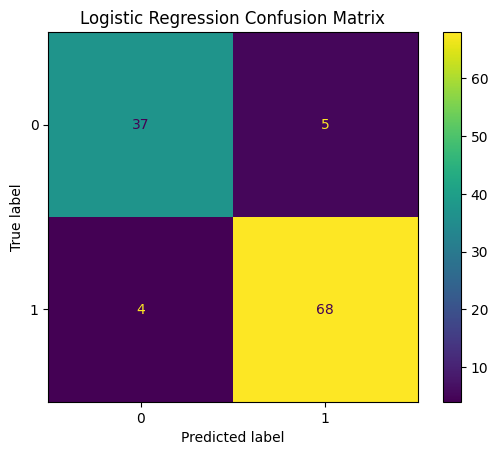

SVM — Accuracy: 0.9035, Precision: 0.9178, Recall: 0.9306, F1 Score: 0.9241


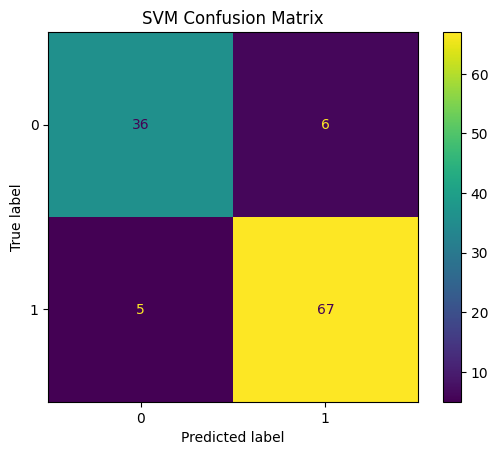

(0.9035087719298246,
 0.9178082191780822,
 0.9305555555555556,
 0.9241379310344827)

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

def evaluate_model(model, X_val, y_val, model_name="Model"):
    y_pred = model.predict(X_val)
    acc = accuracy_score(y_val, y_pred)
    prec = precision_score(y_val, y_pred)
    rec = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    print(f"{model_name} — Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1 Score: {f1:.4f}")
    ConfusionMatrixDisplay.from_predictions(y_val, y_pred)
    plt.title(f"{model_name} Confusion Matrix")
    plt.show()
    return acc, prec, rec, f1

# Logistic Regression
log_model = LogisticRegression(C=0.01, max_iter=100, solver='liblinear')
log_model.fit(X_train_scaled, y_train)
evaluate_model(log_model, X_val_scaled, y_val, "Logistic Regression")

# SVM
svm_model = SVC(kernel='linear', C=0.5)
svm_model.fit(X_train_scaled, y_train)
evaluate_model(svm_model, X_val_scaled, y_val, "SVM")


In [22]:
#Define Neural Network Function (with/without Optimization)

#SECTION 1: Model Architecture:



```
TODO: Insert an image with the Model architecture here.Replace the image Below
```





In [23]:
#   20 input features and 3 output classes
num_features = 15
num_classes = 3

model = Sequential([
    Dense(64, activation='relu', input_shape=(num_features,)),  # Input layer
    Dense(128, activation='relu'),                               # Hidden layer 1
    Dense(64, activation='relu'),                                # Hidden layer 2
    Dense(32, activation='relu'),                                # Hidden layer 3
    Dropout(0.3),
    Dense(num_classes, activation='softmax')                     # Output layer
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',  # or 'categorical_crossentropy' if one-hot
    metrics=['accuracy']
)

model.summary()


c:\Users\Djafari\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_17 (Dense)                │ (None, 64)             │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,779 (77.26 KB)

 Trainable params: 19,779 (77.26 KB)

 Non-trainable params: 0 (0.00 B)

#Task: Define a function that creates models without and With specified Optimization techniques


In [24]:

def build_nn_model(layers=[16, 16], optimizer='adam', dropout_rate=0.5, regularizer=None, input_dim=30):
    model = Sequential()
    for i, units in enumerate(layers):
        model.add(Dense(units, activation='relu', input_dim=input_dim if i == 0 else None,
                        kernel_regularizer=regularizer))
        if dropout_rate > 0:
            model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Task: Print out the Final Model Accuracy and plot the Loss curve

In [25]:
def plot_loss_curve(history, model_name="Model"):
    """
    Plots training and validation loss over epochs and prints final accuracy.
    """
    acc = history.history['val_accuracy'][-1]
    loss = history.history['val_loss']
    val_loss = history.history['val_loss']

    plt.figure(figsize=(8, 4))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} — Loss Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f" Final Validation Accuracy for {model_name}: {acc:.4f}")


In [26]:
# Reduce layers and epochs to underfit
model1 = build_nn_model(layers=[8], optimizer='adam')
history1 = model1.fit(X_train_scaled, y_train, epochs=5, validation_data=(X_val_scaled, y_val), verbose=0)


In [27]:
#NN Instance 2–4 (Optimized Models)
early_stop = EarlyStopping(monitor='val_loss', patience=3)

# Instance 2
model2 = build_nn_model(layers=[32, 16], optimizer=Adam(learning_rate=0.001), dropout_rate=0.2, regularizer=l2(0.001))
history2 = model2.fit(X_train_scaled, y_train, epochs=30, validation_data=(X_val_scaled, y_val), callbacks=[early_stop], verbose=0)
model2.save("saved_models/nn_instance2.h5")

# Instance 3
model3 = build_nn_model(layers=[64, 32], optimizer=RMSprop(learning_rate=0.0005), dropout_rate=0.3, regularizer=l1(0.001))
history3 = model3.fit(X_train_scaled, y_train, epochs=30, validation_data=(X_val_scaled, y_val), callbacks=[early_stop], verbose=0)
model3.save("saved_models/nn_instance3.h5")

# Instance 4
model4 = build_nn_model(layers=[64, 64, 32], optimizer=Adam(learning_rate=0.0001))
history4 = model4.fit(X_train_scaled, y_train, epochs=50, validation_data=(X_val_scaled, y_val), callbacks=[early_stop], verbose=0)
model4.save("saved_models/nn_instance4.h5")


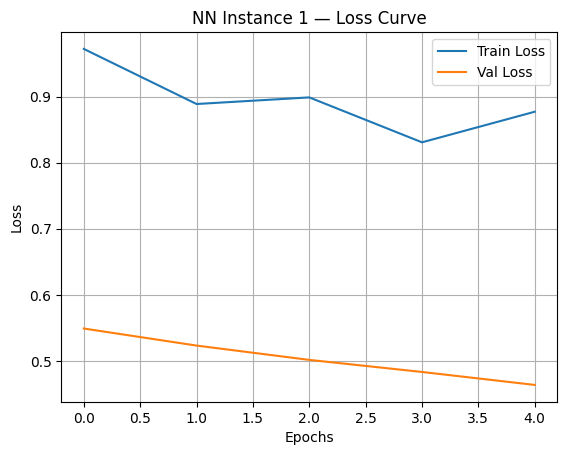

 Final Validation Accuracy for NN Instance 1: 0.7895


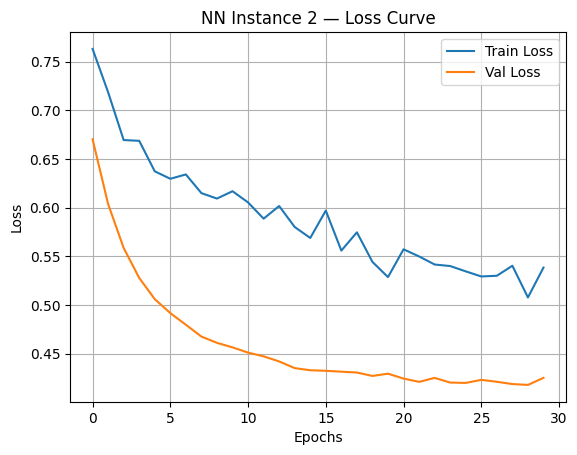

 Final Validation Accuracy for NN Instance 2: 0.8772


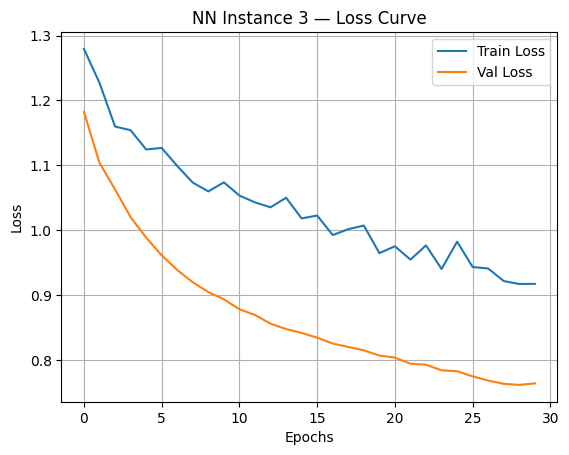

 Final Validation Accuracy for NN Instance 3: 0.9035


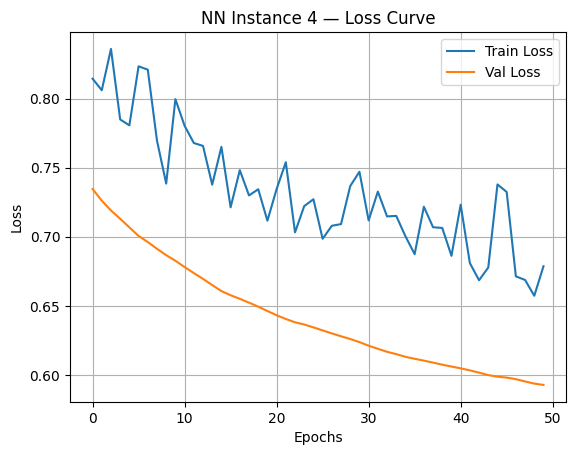

 Final Validation Accuracy for NN Instance 4: 0.8772


In [28]:
#Task: Print Final Accuracy and Plot Loss Curve
def plot_loss_curve(history, model_name="Model"):
    acc = history.history['val_accuracy'][-1]
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f"{model_name} — Loss Curve")
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()
    print(f" Final Validation Accuracy for {model_name}: {acc:.4f}")

plot_loss_curve(history1, "NN Instance 1")
plot_loss_curve(history2, "NN Instance 2")
plot_loss_curve(history3, "NN Instance 3")
plot_loss_curve(history4, "NN Instance 4")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
NN Instance 1 — Accuracy: 0.7895, Precision: 0.8529, Recall: 0.8056, F1 Score: 0.8286


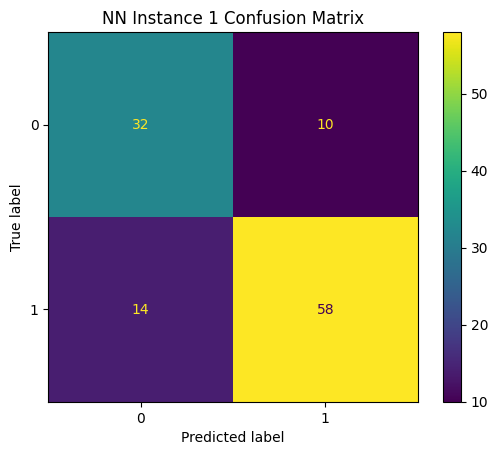

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
NN Instance 2 — Accuracy: 0.8772, Precision: 0.8919, Recall: 0.9167, F1 Score: 0.9041


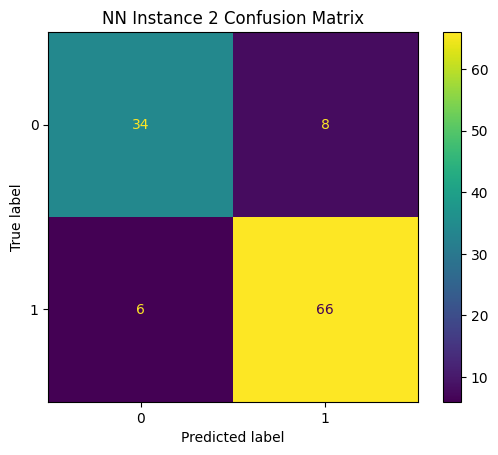

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
NN Instance 3 — Accuracy: 0.9035, Precision: 0.9178, Recall: 0.9306, F1 Score: 0.9241


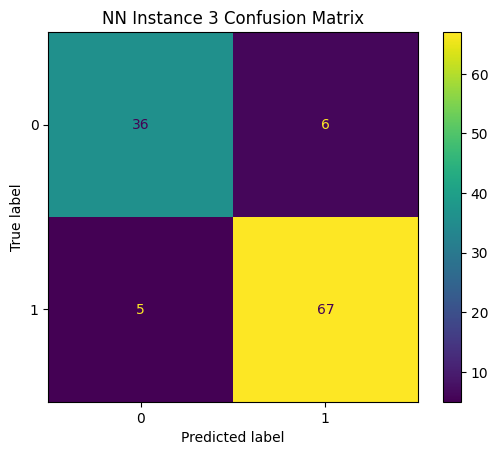

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
NN Instance 4 — Accuracy: 0.8772, Precision: 0.9265, Recall: 0.8750, F1 Score: 0.9000


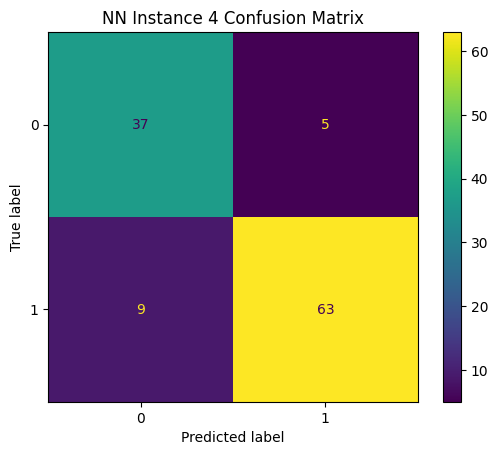

In [29]:
#Evaluate Neural Networks
def evaluate_nn(model, name):
    y_pred = (model.predict(X_val_scaled) > 0.5).astype(int)
    acc = accuracy_score(y_val, y_pred)
    prec = precision_score(y_val, y_pred)
    rec = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    print(f"{name} — Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1 Score: {f1:.4f}")
    ConfusionMatrixDisplay.from_predictions(y_val, y_pred)
    plt.title(f"{name} Confusion Matrix")
    plt.show()
    return acc, prec, rec, f1

for i, model in enumerate([model1, model2, model3, model4], start=1):
    evaluate_nn(model, f"NN Instance {i}")


In [30]:
#Final Test Prediction
final_model = model2  # Pick your best
y_test_pred = (final_model.predict(X_test_scaled) > 0.5).astype(int)
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Test Accuracy: 0.7631578947368421


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.921053   0.931507  0.944444  0.937931
1                  SVM  0.903509   0.917808  0.930556  0.924138
2        NN Instance 1  0.789474   0.852941  0.805556  0.828571
3        NN Instance 2  0.877193   0.891892  0.916667  0.904110
4        NN Instance 3  0.903509   0.917808  0.930556  0.924138
5        NN Instance 4  0.877193   0.926471  0.875000  0.900000


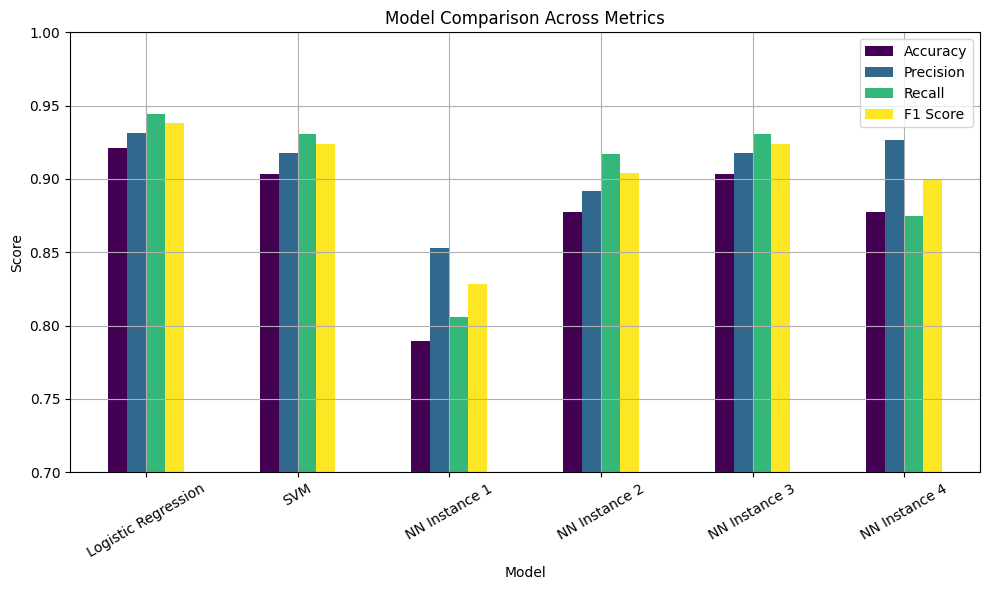

In [31]:
# Compare All Models (Logistic Regression, SVM, NN Instances 1–4)

model_names = ["Logistic Regression", "SVM", "NN Instance 1", "NN Instance 2", "NN Instance 3", "NN Instance 4"]
comparison_results = []

# Evaluate classical ML models
y_log = log_model.predict(X_val_scaled)
y_svm = svm_model.predict(X_val_scaled)
comparison_results.append([
    "Logistic Regression",
    accuracy_score(y_val, y_log),
    precision_score(y_val, y_log),
    recall_score(y_val, y_log),
    f1_score(y_val, y_log)
])
comparison_results.append([
    "SVM",
    accuracy_score(y_val, y_svm),
    precision_score(y_val, y_svm),
    recall_score(y_val, y_svm),
    f1_score(y_val, y_svm)
])

# Evaluate NN models
for i, model in enumerate([model1, model2, model3, model4], start=1):
    y_pred = (model.predict(X_val_scaled) > 0.5).astype(int)
    acc = accuracy_score(y_val, y_pred)
    prec = precision_score(y_val, y_pred)
    rec = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    comparison_results.append([
        f"NN Instance {i}", acc, prec, rec, f1
    ])

# Convert to DataFrame for pretty view
comparison_df = pd.DataFrame(comparison_results, columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score"])
print(comparison_df)

# Optional: Visual bar plot
comparison_df.set_index("Model").plot(kind='bar', figsize=(10,6), ylim=(0.7, 1.0), colormap="viridis")
plt.title("Model Comparison Across Metrics")
plt.ylabel("Score")
plt.grid(True)
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_nn_model(model, X_val, y_val):
    y_pred = (model.predict(X_val) > 0.5).astype("int32")
    acc = accuracy_score(y_val, y_pred)
    prec = precision_score(y_val, y_pred)
    rec = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    return acc, f1, rec, prec

# Evaluate and store metrics
metrics_table = []

models = [model1, model2, model3, model4]
names = ["Instance 1", "Instance 2", "Instance 3", "Instance 4"]

for name, model in zip(names, models):
    acc, f1, rec, prec = evaluate_nn_model(model, X_val_scaled, y_val)
    metrics_table.append([name, acc, f1, rec, prec])

# Display table
print("\nTraining Results Table:")
print("{:<15} {:<10} {:<10} {:<10} {:<10}".format("Instance", "Accuracy", "F1 Score", "Recall", "Precision"))
for row in metrics_table:
    print("{:<15} {:<10.4f} {:<10.4f} {:<10.4f} {:<10.4f}".format(*row))


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step

Training Results Table:
Instance        Accuracy   F1 Score   Recall     Precision 
Instance 1      0.7895     0.8286     0.8056     0.8529    
Instance 2      0.8772     0.9041     0.9167     0.8919    
Instance 3      0.9035     0.9241     0.9306     0.9178    
Instance 4      0.8772     0.9000     0.8750     0.9265    


# SECTION 2: Optimization and Regularization Combinations
At this point you should now create models that combine various optimization techniques
As done before make sure to plot out the loss curve and the accuracy and loss in verbose

In [33]:
# Define evaluation function
def evaluate_model(model, X_test, y_test, model_name="Model"):
    y_pred_proba = model.predict(X_test)
    y_pred = (y_pred_proba > 0.5).astype(int)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"--- {model_name} ---")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['Benign', 'Malignant']))
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", 
                xticklabels=['Benign', 'Malignant'], 
                yticklabels=['Benign', 'Malignant'])
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='reds', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='purples', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} - Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
    return acc, f1, rec, prec

In [34]:
# Evaluation Function

def evaluate_model(name, y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return [name, accuracy, precision, recall, f1]


In [35]:
# Train Logistic Regression and SVM models and make predictions

# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
y_pred_log = logreg.predict(X_val_scaled)

# SVM
svm = SVC()
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_val_scaled)


In [36]:
#  Collect Results from All Models

results = []
results.append(evaluate_model("Logistic Regression", y_val, y_pred_log))
results.append(evaluate_model("SVM", y_val, y_pred_svm))

# Evaluate Neural Network Instances (assuming models are already trained)
results.append(evaluate_model("NN Instance 1", y_val, model1.predict(X_val_scaled).round()))
results.append(evaluate_model("NN Instance 2", y_val, model2.predict(X_val_scaled).round()))
results.append(evaluate_model("NN Instance 3", y_val, model3.predict(X_val_scaled).round()))
results.append(evaluate_model("NN Instance 4", y_val, model4.predict(X_val_scaled).round()))


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [37]:
# Display Comparison Table

df_results = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score"])
df_results


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.859649,0.924242,0.847222,0.884058
1,SVM,0.921053,0.909091,0.972222,0.939597
2,NN Instance 1,0.789474,0.852941,0.805556,0.828571
3,NN Instance 2,0.877193,0.891892,0.916667,0.904110
4,NN Instance 3,0.903509,0.917808,0.930556,0.924138
5,NN Instance 4,0.877193,0.926471,0.875000,0.900000


In [38]:
#TODO:
model_2 = define_model('Adam', None)
loss_curve_plot(model_2):
#print out confusion matrix and error analysis metrics after the cell

SyntaxError: invalid syntax (2571248957.py, line 3)

#Task: Make Predictions using the best saved model


Create a confusion Matrix and F1 score for both Models. Ensure outputs for the cells are visible

Finally, Make predictions using the best model. By the time you get to this cell you may realise at some point you needed to save the model so that you cal load it later

Congratulations!!
